# Music Analyse <br>
**Lecture for Digitalisation in the Industry WS 21/22<br>
University Stuttgart, please refer to the original source under: <br>
https://github.com/musikalkemist/AudioSignalProcessingForML/blob/master/14-%20Extracting%20the%20Discrete%20Fourier%20Transform/Visualising%20the%20Power%20Spectrum.ipynb
from 01.03.2022**

### Einleitung <br>
Nun werden wir die Bedeutung der im Signal enthaltenen Frequenzen anhand von Klängen verschiedener Instrumente verdeutlichen.

### Importieren der benötigten Python-Pakete

**os:**<br>
Das OS Modul in Python gibt dir Zugriff auf einige Funktionen des Betriebssystems (z.B. Windows). Wir verwenden es um auf die Sounddateien über Jupyter Notekook zugreifen zu können.

**Numpy:**<br>
Allgemeine numerische Bibliothek, wir verwenden sie um die fft - Funktion durchzuführen.

**Matplotlib:**<br> 
Dieses Modul erstellt 2-D Grafiken und Abbildungen, wir verwenden sie zum die Frequenzgänge zu plotten.

**librosa:**<br>
Librosa ist ein Paket, welches die Analyse von Audiodateien ermöglicht. Wir verwenden es um die Sounddateien in Jupyter Notebooks zu laden.

**IPython:**<br>
Wir verwenden dieses Paket um die Sounddateien direkt in Jupyter Notebook abspielen zu können.

# Installieren verwendeter Python Pakete
Wir installieren die Bibliotheken mit dem Command pip.
Wenn am Beginn einer "Code" Zelle ein "!" steht wird eine Shell mit diesem Befehl ausgeführt.

In [1]:
!pip list

Package                       Version
----------------------------- ------------
absl-py                       1.1.0
alabaster                     0.7.12
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.6
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autopep8                      1.6.0
Babel                         2.10.3
backcall                      0.2.0
bcrypt                        3.2.2
beautifulsoup4                4.11.1
binaryornot                   0.4.4
black                         22.3.0
bleach                        5.0.0
cachetools                    5.2.0
certifi                       2022.6.15
cffi                          1.15.0
chardet                       4.0.0
charset-normalizer            2.0.12
click

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import librosa, librosa.display
import IPython.display as ipd

In [ ]:
#!pip install librosa

Angenommen, wir haben nur ein Jupyter Notebook und keinen Zugriff auf die Schell, wie kann dann trotzdem auf die Files aus unserem Programm zugegriffen werden?

In [3]:
import os
if os.name == 'nt':
    local_path=!@echo %cd%
    !dir /B
if os.name == 'posix':
    local_path=!pwd
    print ("current Path:", local_path)
    !ls -a
    
print (type (local_path))
local_path= str(local_path)
print (type (local_path))
print ("current Path:", local_path)
local_path=local_path[2:-2]
print ("current Path:", local_path)

.ipynb_checkpoints
Music Analyse.ipynb
Music Analyse_trueter.ipynb
Musik Analyse.ipynb
MusikAnalyse.ipynb
piano_c5.wav
Pumpe.wav
saxophone_c4.wav
violin_c4.wav
<class 'IPython.utils.text.SList'>
<class 'str'>
current Path: ['C:\\Users\\ThomasRueter\\Desktop\\Vorlesung 21.6.22\\3. Jupyter Notebook Codes\\2. music analysing']
current Path: C:\\Users\\ThomasRueter\\Desktop\\Vorlesung 21.6.22\\3. Jupyter Notebook Codes\\2. music analysing


In [4]:
## Alternativ kann auch direkt mit dem Modul "os" gearbeitet werden 
# Dokumnetation ist unter https://docs.python.org/3/library/os.html zu finden
print(os.getcwd())
os.listdir()

C:\Users\ThomasRueter\Desktop\Vorlesung 21.6.22\3. Jupyter Notebook Codes\2. music analysing


['.ipynb_checkpoints',
 'Music Analyse.ipynb',
 'Music Analyse_trueter.ipynb',
 'Musik Analyse.ipynb',
 'MusikAnalyse.ipynb',
 'piano_c5.wav',
 'Pumpe.wav',
 'saxophone_c4.wav',
 'violin_c4.wav']

**Laden und Vorstellung der Audiofiles** <br>
Nun laden wir die Audiofiles in Jupyter Notebooks. <br>
Es liegen vier Files vor: <br>
- **violin_c4**    <br>Das mittlere C (C4) auf der Violine
- **saxophon_c4**  <br>Das mittlere C (C4) auf dem Saxophone
- **piano_c5**     <br>Eine Oktave höher als das mittlere C (C5) auf dem Klavier
- **Pumpe**        <br>Das Geräusch einer Industriepumpe
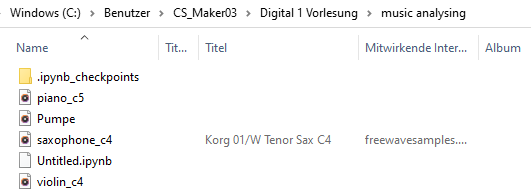

In [6]:
violin_sound_file = "violin_c4.wav"
saxophone_sound_file = "saxophone_c4.wav"
piano_sound_file = "piano_c5.wav"
pumpe_sound_file = "Pumpe.wav"

In [8]:
from IPython.display import Audio 
from IPython.display import display

#audio_file=os.path.join(BASE_FOLDER, violin_sound_file)
audio_file=os.path.join(local_path, violin_sound_file)
ipd.Audio(audio_file)

Nun können wir uns die Audiofiles direkt in Jupyter Notebooks anhören:

In [9]:
ipd.Audio(os.path.join(local_path, violin_sound_file)) 

In [10]:
ipd.Audio(os.path.join(local_path, saxophone_sound_file)) 

In [11]:
ipd.Audio(os.path.join(local_path, piano_sound_file)) 

In [12]:
ipd.Audio(os.path.join(local_path, pumpe_sound_file)) 

Nun lesen wir die Audiofiles mittels des librosa Pakets in Jupyter Notebook ein. Diese liegen anschließend in Form eines Arrays vor, in welchem die Sampling Points hinterlegt sind.

In [13]:
violin_c4, sr = librosa.load(os.path.join(local_path, violin_sound_file))
piano_c5, _ = librosa.load(os.path.join(local_path, piano_sound_file))
saxophone_c4, _ = librosa.load(os.path.join(local_path, saxophone_sound_file))
Pumpe, _ = librosa.load(os.path.join(local_path, pumpe_sound_file))

Der Befehl *len()* gibt die Anzahl der Spalten eines Arrays aus. Somit können wir die Anzahl der Sampling Points der einzelnen Files untersuchen.

In [14]:
len(violin_c4)

59772

### Transformation in den Frequenzbereich <br>
Nun können wir die Signale mittels der Fourier Transformation in den Frequenzbereich transformieren

In [15]:
fft_violin_c4 = np.fft.fft(violin_c4)

**Untersuchung der Ergebnisse der Fourier Transformation** <br>
Zunächst untersuchen wir die Form des Arrays

In [16]:
len(fft_violin_c4)

59772

Die Form des zeitdiskreten und des frequenzdiskreten Arrays sind identisch. Dies bassiert darauf, dass die Fourier Transformation zu jedem Sampling Point eine das Häufigkeitselement der zugehörigen Frequenz ausgibt.
<br>
<br>
Nun schauen wir uns ein Element aus dem Array an:

In [17]:
fft_violin_c4[0]

(-0.853675452430456-5.162537064506978e-15j)

Das Ergebnis der fft ist eine komplexe Zahl. Der Realteil repräsentiert das Häufigkeitselement einer Frequenz im Signal und ist somit für uns relevant. Die Funktion *abs()* schreibt nur den Realanteil einer komplexen Zahl in einen Array.

In [18]:
magnitude_spectrum_violin = np.abs(fft_violin_c4)

In [19]:
magnitude_spectrum_violin[0]

0.853675452430456

Nun können wir den Frequenzbereich plotten.

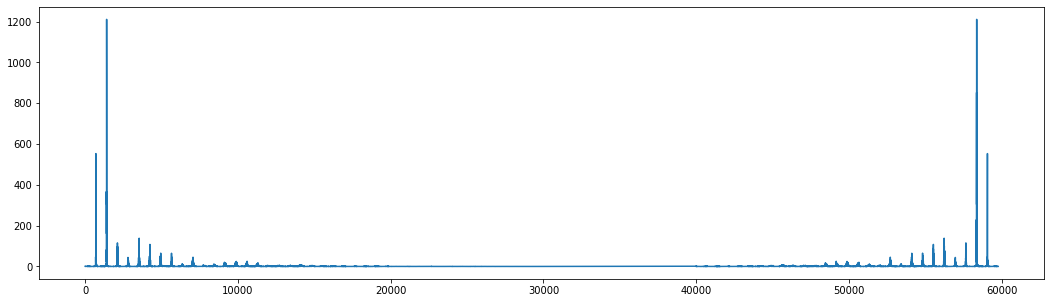

In [20]:
plt.figure(figsize=(18, 5))
plt.plot(magnitude_spectrum_violin)

Wie man sieht sind die Werte der fft Funktion Symmetrisch zum Punkt len(signal)/2. Somit enthält die zweite Hälfte der Werte keine weitere Information und kann zur Vereinfachung vernachlässigt werden. Dafür grenzen wir die angezeigten Werte der x-Achse ein und passen die Größe des Plots an.

In [21]:
plt.figure(figsize=(18, 5))
plt.xlim(0,len(magnitude_spectrum_violin)/2)
plt.plot(magnitude_spectrum_violin)

### Erstellen einer Plotfunktion <br>
Nun schreiben wir eine Funktion, welche ein schnelles plotten und vergleichen der Frequenzgänge erlaubt:

In [22]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    ft = np.fft.fft(signal)
    magnitude_spectrum = np.abs(ft)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(magnitude_spectrum))
    f_bins = int(len(magnitude_spectrum)*f_ratio)  
    
    plt.plot(f[:f_bins], magnitude_spectrum[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

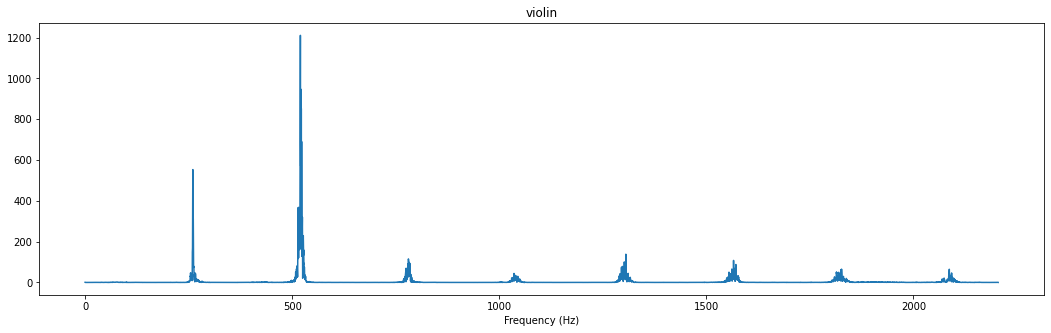

In [22]:
plot_magnitude_spectrum(violin_c4, sr, "violin", 0.1)

In [23]:
plot_magnitude_spectrum(saxophone_c4, sr, "saxophone", 0.1)

Wie man sieht sind die enhaltenen Frequenzen des C4 für beide Instrumente beinahe identisch. Die Ausschläge und somit der Energiegehalt der Schwingungen sind jedoch unterschiedlich stark ausgeprägt, was unter anderem dafür verantwortlich ist, dass die Klänge unterschiedlich wahrgenommen werden. <br>

Schauen wir uns nun das C5 auf dem Klavier an: <br>
Das C5 ist eine Oktave höher als das C4. Mathematisch betrachtet verdoppelt sich je Oktave die Frequenz der schwingenden Saite:

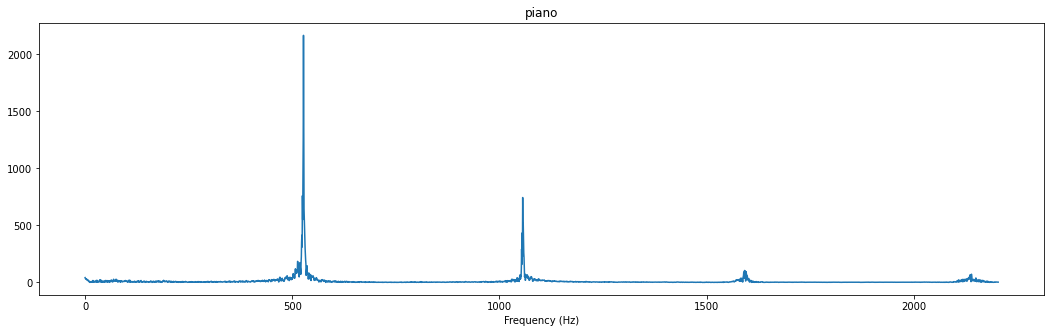

In [24]:
plot_magnitude_spectrum(piano_c5, sr, "piano", 0.1)

Zuletzt betrachten wir den Frequenzgang der Industriepumpe:

In [25]:
plot_magnitude_spectrum(Pumpe, sr, "Pumpe", 0.1)

Die hier enthaltenen Frequenzen sind vielfältiger und besonders im unteren Frequenzbereich angesiedelt. Um die relevanten Frequenzen zu isolieren, kann das Signal gefiltert werden. Im Folgenden werden wir einen simplen Filter in Jupyter Notebook entwerfen.